In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [9]:
df = pd.read_csv("Fish.csv")

df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [12]:
cdf = df[['Height', 'Width', 'Length3', 'Length2', 'Length1', 'Weight']]
cdf.head(10)

,Height,Width,Length3,Length2,Length1,Weight
0,11.5200,4.0200,30.0,25.4,23.2,242.0
1,12.4800,4.3056,31.2,26.3,24.0,290.0
2,12.3778,4.6961,31.1,26.5,23.9,340.0
3,12.7300,4.4555,33.5,29.0,26.3,363.0
4,12.4440,5.1340,34.0,29.0,26.5,430.0
5,13.6024,4.9274,34.7,29.7,26.8,450.0
6,14.1795,5.2785,34.5,29.7,26.8,500.0
7,12.6700,4.6900,35.0,30.0,27.6,390.0
8,14.0049,4.8438,35.1,30.0,27.6,450.0
9,14.2266,4.9594,36.2,30.7,28.5,500.0


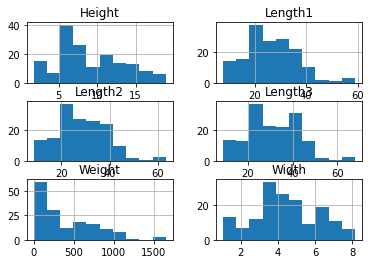

In [14]:
cdf.hist()
plt.show()

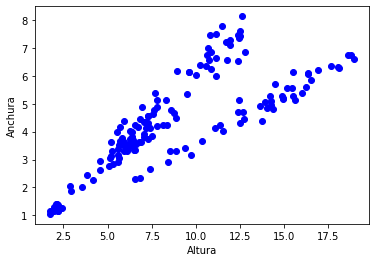

In [18]:
plt.scatter(cdf.Height, cdf.Width, color = 'blue')
plt.xlabel("Altura")
plt.ylabel("Anchura")
plt.show()

In [19]:
msk = np.random.rand(len(cdf)) < 0.8

train = cdf[msk]
test = cdf[~msk]

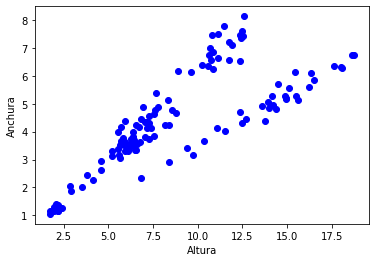

In [22]:
plt.scatter(train.Height, train.Width, color = 'blue')
plt.xlabel("Altura")
plt.ylabel("Anchura")
plt.show()

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Height']])
train_y = np.asanyarray(train[['Width']])

regr.fit(train_x, train_y)

print("Coeficientes: ", regr.coef_)
print("intercepto: ", regr.intercept_)

Coeficientes:  [[0.31994183]]
intercepto:  [1.58162545]


Text(0, 0.5, 'Anchura')

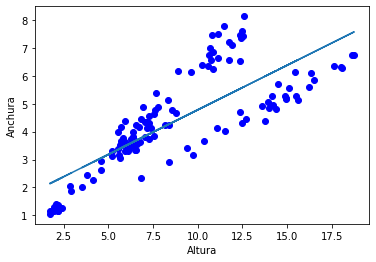

In [29]:
plt.scatter(train.Height, train.Width, color = 'blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0])
plt.xlabel("Altura")
plt.ylabel("Anchura")

In [30]:
test_x = np.asanyarray(test[['Height']])
test_y = np.asanyarray(test[['Width']])
test_y_gorro = regr.predict(test_x)

print("MSE: %.3f" % np.mean(test_y_gorro - test_y) ** 2)

MSE: 0.029
